#### Project - Based Internship : Data Scientist Home Credit Indonesia

# Home Credit Scorecard Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Load Data

In [3]:
apptrain = pd.read_csv('application_train.csv')
apptest = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
burbalance = pd.read_csv('bureau_balance.csv')
ccbalance = pd.read_csv('credit_card_balance.csv')
inspay = pd.read_csv('installments_payments.csv')
pcbalance = pd.read_csv('POS_CASH_balance.csv')
prevapp = pd.read_csv('previous_application.csv')

## About Datasets

In [4]:
print('application train shape:', apptrain.shape)
print('application test shape:', apptest.shape)
print('bureau shape:', bureau.shape)
print('bureau balance shape:', burbalance.shape)
print('credit card balance shape:', ccbalance.shape)
print('installments payments shape:', inspay.shape)
print('pos cash balance shape:', pcbalance.shape)
print('previous application shape:', prevapp.shape)

application train shape: (307511, 122)
application test shape: (48744, 121)
bureau shape: (1716428, 17)
bureau balance shape: (27299925, 3)
credit card balance shape: (3840312, 23)
installments payments shape: (13605401, 8)
pos cash balance shape: (10001358, 8)
previous application shape: (1670214, 37)


In [5]:
apptrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
apptest.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [7]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [8]:
burbalance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [9]:
ccbalance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [10]:
inspay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [11]:
pcbalance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [12]:
prevapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

**Duplicated Values**

In [13]:
print('Duplicated Values:')
print('application train shape:', apptrain.duplicated().sum())
print('application test shape:', apptest.duplicated().sum())
print('bureau shape:', bureau.duplicated().sum())
print('bureau balance shape:', burbalance.duplicated().sum())
print('credit card balance shape:', ccbalance.duplicated().sum())
print('installments payments shape:', inspay.duplicated().sum())
print('pos cash balance shape:', pcbalance.duplicated().sum())
print('previous application shape:', prevapp.duplicated().sum())

Duplicated Values:
application train shape: 0
application test shape: 0
bureau shape: 0
bureau balance shape: 0
credit card balance shape: 0
installments payments shape: 0
pos cash balance shape: 0
previous application shape: 0


**Handling Missing Value**

Missing values are going to be handled by dropping features that have more than 50% of missing values. Then for features that has less than 50% of missing values are going to be imputated with mode values for categorical features and median values for numerical features.

Application Train

In [14]:
apptrain.isnull().mean().sort_values(ascending=False)

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

In [15]:
apptrain2 = apptrain.drop(columns=apptrain.columns[apptrain.isnull().mean() > 0.4])

In [16]:
# missing values imputation
def fill(series):
    if series.dtype == 'object':  # categorical
        return series.fillna(series.mode()[0])
    else:  # numerical
        return series.fillna(series.median())

apptrain2 = apptrain2.apply(fill)

In [17]:
apptrain2.isnull().mean().sort_values(ascending=False)

SK_ID_CURR                     0.0
REG_CITY_NOT_WORK_CITY         0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_2                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
EXT_SOURCE_3                   0.0
EXT_SOURCE_2                   0.0
ORGANIZATION_TYPE              0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10               0.0
FLAG_DOCUMENT_11               0.0
FLAG_DOCUMENT_20               0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
FLAG_DOCUMENT_21               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_12    

Application Test

In [18]:
apptest.isnull().mean().sort_values(ascending=False)

COMMONAREA_AVG                  0.687161
COMMONAREA_MODE                 0.687161
COMMONAREA_MEDI                 0.687161
NONLIVINGAPARTMENTS_AVG         0.684125
NONLIVINGAPARTMENTS_MODE        0.684125
NONLIVINGAPARTMENTS_MEDI        0.684125
FONDKAPREMONT_MODE              0.672842
LIVINGAPARTMENTS_AVG            0.672493
LIVINGAPARTMENTS_MODE           0.672493
LIVINGAPARTMENTS_MEDI           0.672493
FLOORSMIN_MEDI                  0.666051
FLOORSMIN_AVG                   0.666051
FLOORSMIN_MODE                  0.666051
OWN_CAR_AGE                     0.662892
YEARS_BUILD_AVG                 0.652757
YEARS_BUILD_MEDI                0.652757
YEARS_BUILD_MODE                0.652757
LANDAREA_MEDI                   0.579641
LANDAREA_AVG                    0.579641
LANDAREA_MODE                   0.579641
BASEMENTAREA_MEDI               0.567065
BASEMENTAREA_AVG                0.567065
BASEMENTAREA_MODE               0.567065
NONLIVINGAREA_AVG               0.535122
NONLIVINGAREA_MO

In [19]:
apptest2 = apptest.drop(columns=apptest.columns[apptest.isnull().mean() > 0.4])

In [20]:
# missing values imputation
def fill(series):
    if series.dtype == 'object':  # categorical
        return series.fillna(series.mode()[0])
    else:  # numerical
        return series.fillna(series.median())

apptest2 = apptest2.apply(fill)

Bureau

In [21]:
bureau.isnull().mean().sort_values(ascending=False)

AMT_ANNUITY               0.714735
AMT_CREDIT_MAX_OVERDUE    0.655133
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_DEBT       0.150119
DAYS_CREDIT_ENDDATE       0.061496
AMT_CREDIT_SUM            0.000008
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
SK_ID_BUREAU              0.000000
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
SK_ID_CURR                0.000000
dtype: float64

In [22]:
bureau2 = bureau.drop(columns=bureau.columns[bureau.isnull().mean() > 0.4])

In [23]:
# missing values imputation
def fill(series):
    if series.dtype == 'object':  # categorical
        return series.fillna(series.mode()[0])
    else:  # numerical
        return series.fillna(series.median())

bureau2 = bureau2.apply(fill)

Bureau Balance

In [24]:
burbalance.isnull().mean().sort_values(ascending=False)

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

Credit Card Balance

In [25]:
ccbalance.isnull().mean().sort_values(ascending=False)

AMT_PAYMENT_CURRENT           0.199981
AMT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_INSTALMENT_MATURE_CUM     0.079482
AMT_INST_MIN_REGULARITY       0.079482
SK_ID_PREV                    0.000000
AMT_TOTAL_RECEIVABLE          0.000000
SK_DPD                        0.000000
NAME_CONTRACT_STATUS          0.000000
CNT_DRAWINGS_CURRENT          0.000000
AMT_PAYMENT_TOTAL_CURRENT     0.000000
AMT_RECIVABLE                 0.000000
AMT_RECEIVABLE_PRINCIPAL      0.000000
SK_ID_CURR                    0.000000
AMT_DRAWINGS_CURRENT          0.000000
AMT_CREDIT_LIMIT_ACTUAL       0.000000
AMT_BALANCE                   0.000000
MONTHS_BALANCE                0.000000
SK_DPD_DEF                    0.000000
dtype: float64

In [26]:
# missing values imputation
def fill(series):
    if series.dtype == 'object':  # categorical
        return series.fillna(series.mode()[0])
    else:  # numerical
        return series.fillna(series.median())

ccbalance2 = ccbalance.apply(fill)

Installments Payments

In [27]:
inspay.isnull().mean().sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        0.000214
AMT_PAYMENT               0.000214
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64

In [28]:
# missing values imputation
def fill(series):
    if series.dtype == 'object':  # categorical
        return series.fillna(series.mode()[0])
    else:  # numerical
        return series.fillna(series.median())

inspay2 = inspay.apply(fill)

POS CASH Balance

In [29]:
pcbalance.isnull().mean().sort_values(ascending=False)

CNT_INSTALMENT_FUTURE    0.002608
CNT_INSTALMENT           0.002607
SK_ID_PREV               0.000000
SK_ID_CURR               0.000000
MONTHS_BALANCE           0.000000
NAME_CONTRACT_STATUS     0.000000
SK_DPD                   0.000000
SK_DPD_DEF               0.000000
dtype: float64

In [30]:
# missing values imputation
def fill(series):
    if series.dtype == 'object':  # categorical
        return series.fillna(series.mode()[0])
    else:  # numerical
        return series.fillna(series.median())

pcbalance2 = pcbalance.apply(fill)

Previous Application

In [31]:
prevapp.isnull().mean().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       9.964370e-01
RATE_INTEREST_PRIMARY          9.964370e-01
AMT_DOWN_PAYMENT               5.363648e-01
RATE_DOWN_PAYMENT              5.363648e-01
NAME_TYPE_SUITE                4.911975e-01
NFLAG_INSURED_ON_APPROVAL      4.029813e-01
DAYS_TERMINATION               4.029813e-01
DAYS_LAST_DUE                  4.029813e-01
DAYS_LAST_DUE_1ST_VERSION      4.029813e-01
DAYS_FIRST_DUE                 4.029813e-01
DAYS_FIRST_DRAWING             4.029813e-01
AMT_GOODS_PRICE                2.308177e-01
AMT_ANNUITY                    2.228667e-01
CNT_PAYMENT                    2.228637e-01
PRODUCT_COMBINATION            2.071591e-04
AMT_CREDIT                     5.987257e-07
NAME_YIELD_GROUP               0.000000e+00
NAME_PORTFOLIO                 0.000000e+00
NAME_SELLER_INDUSTRY           0.000000e+00
SELLERPLACE_AREA               0.000000e+00
CHANNEL_TYPE                   0.000000e+00
NAME_PRODUCT_TYPE              0.000000e+00
SK_ID_PREV                     0

In [32]:
prevapp2 = prevapp.drop(columns=prevapp.columns[prevapp.isnull().mean() > 0.4])

In [33]:
# missing values imputation
def fill(series):
    if series.dtype == 'object':  # categorical
        return series.fillna(series.mode()[0])
    else:  # numerical
        return series.fillna(series.median())

prevapp2 = prevapp2.apply(fill)

## Exploratory Data Analysis (EDA)

#### Main Data
Application Train

In [34]:
apptrain2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [35]:
apptrain2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Univariate Analysis

**Target** </br>
0 = No difficulties</br>
1 = Payment difficulties

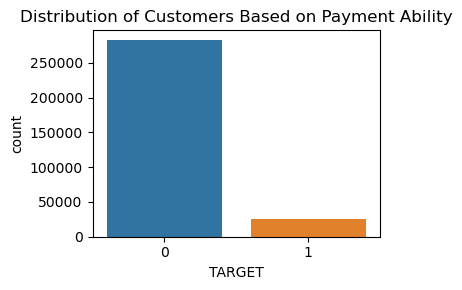

In [36]:
plt.figure(figsize=(4,3))
sns.countplot(x='TARGET', data=apptrain2)
plt.title('Distribution of Customers Based on Payment Ability')
plt.tight_layout()
plt.show()

Insight:
- There are a lot more customers who don't have difficulties in paying back the loan.

### Bivariate Analysis

**Categorical Features vs Target**

In [74]:
dfeda = apptrain2.copy()

In [75]:
dfeda.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


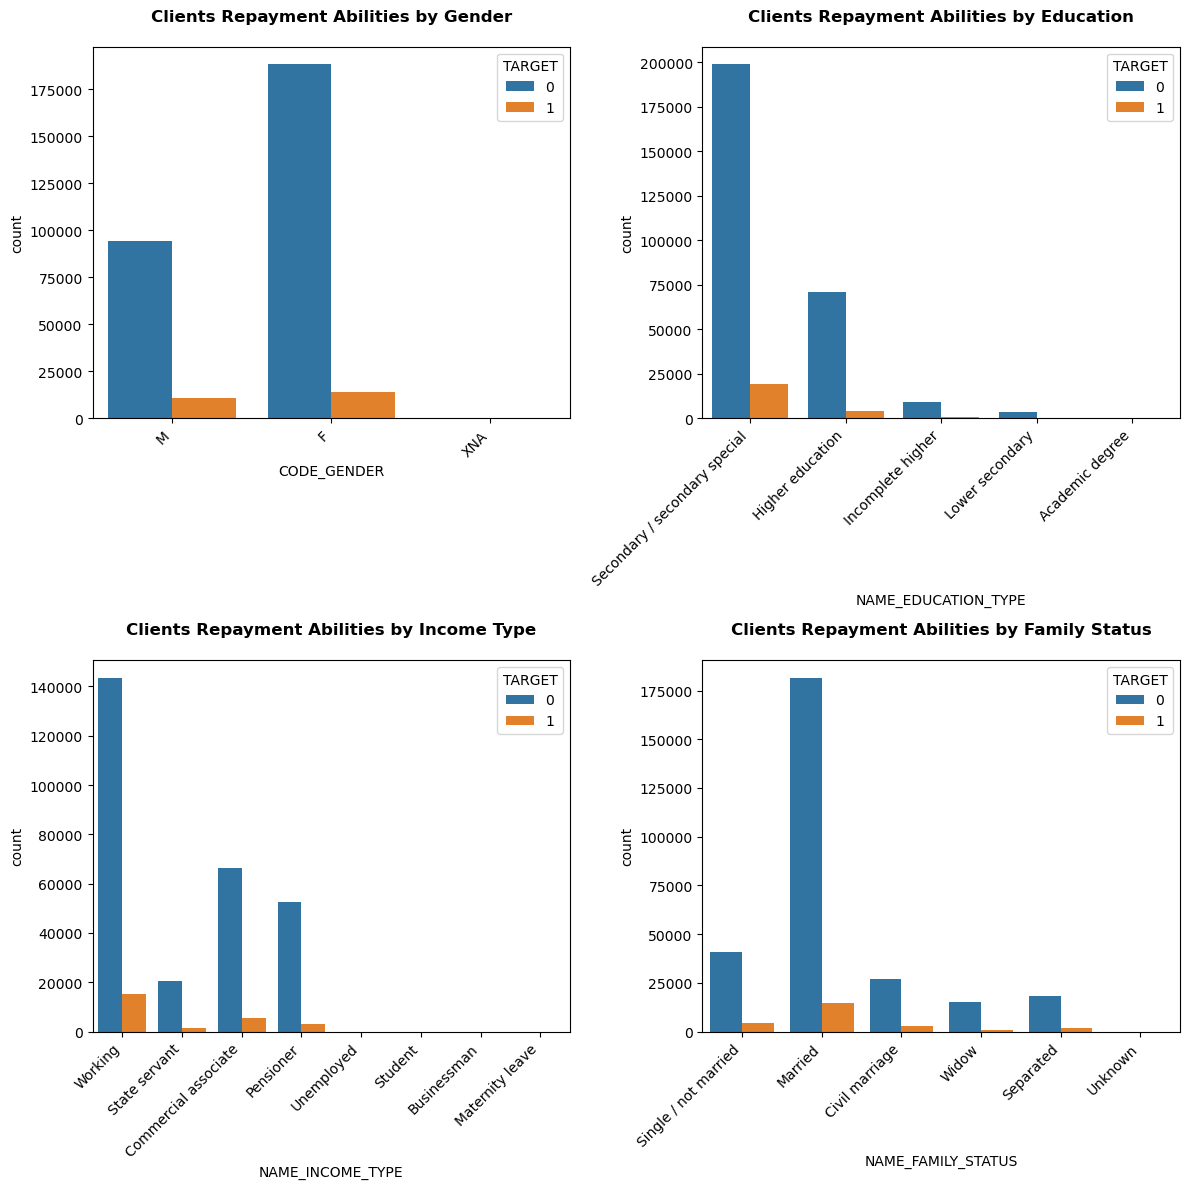

In [83]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0][0].set_title('Clients Repayment Abilities by Gender\n', fontweight='bold', fontsize=12)
sns.countplot(x='CODE_GENDER', data=dfeda, hue='TARGET', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities by Education\n', fontweight='bold', fontsize=12)
sns.countplot(x='NAME_EDUCATION_TYPE', data=dfeda, hue='TARGET', ax=ax[0][1])
ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation=45, ha='right')

ax[1][0].set_title('Clients Repayment Abilities by Income Type\n', fontweight='bold', fontsize=12)
sns.countplot(x='NAME_INCOME_TYPE', data=dfeda, hue='TARGET', ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=45, ha='right')

ax[1][1].set_title('Clients Repayment Abilities by Family Status\n', fontweight='bold', fontsize=12)
sns.countplot(x='NAME_FAMILY_STATUS', data=dfeda, hue='TARGET', ax=ax[1][1])
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


Insights:
- There are a lot more female clients that has no payment difficulties.
- A lot more customers who has education of secondary / secondary special has no payment difficulties.
- In general, customers who work and married applied more for loan and tend to have no difficulties in paying back.

[Text(0, 0, 'Unaccompanied'),
 Text(1, 0, 'Family'),
 Text(2, 0, 'Spouse, partner'),
 Text(3, 0, 'Children'),
 Text(4, 0, 'Other_A'),
 Text(5, 0, 'Other_B'),
 Text(6, 0, 'Group of people')]

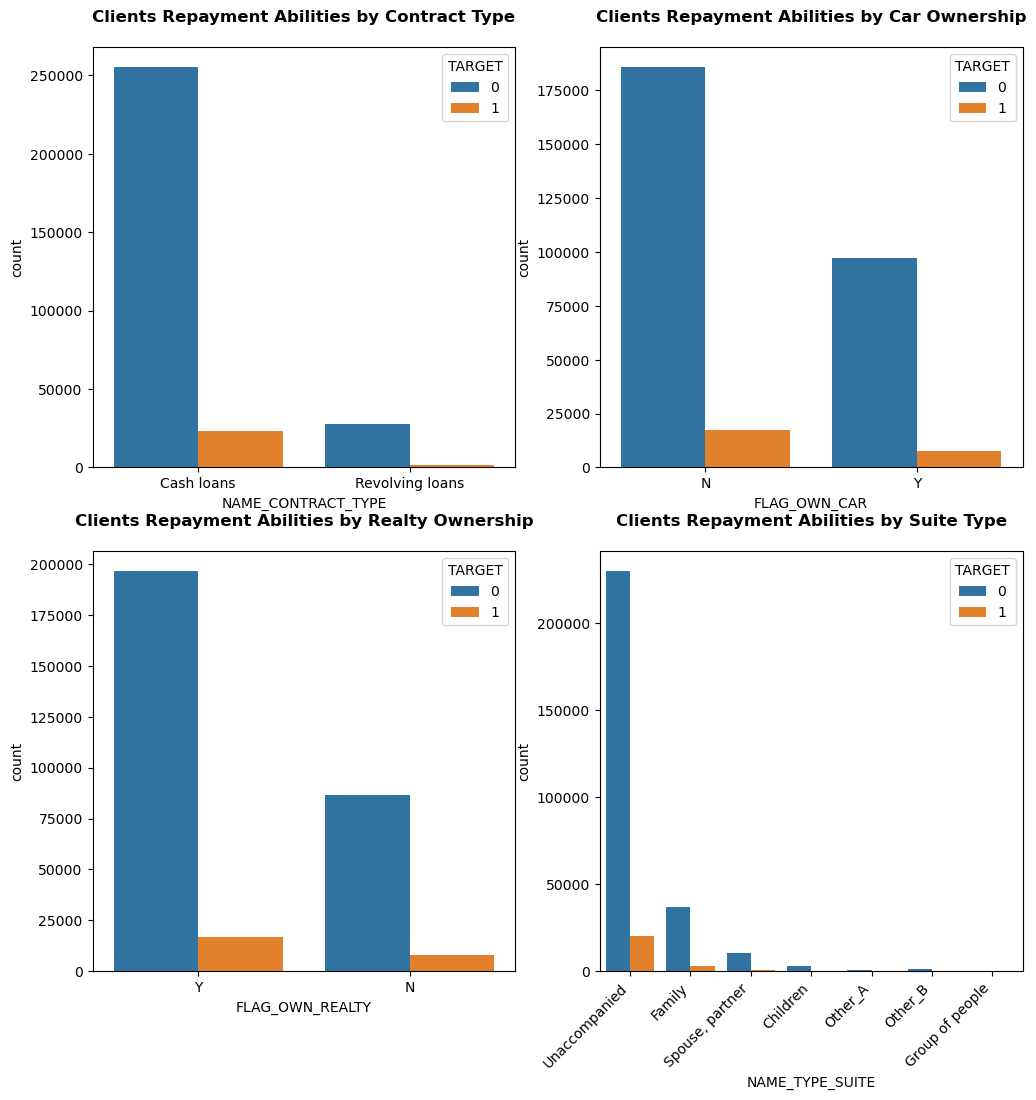

In [90]:
fig, ax = plt.subplots(2,2, figsize=(12,12))

ax[0][0].set_title('Clients Repayment Abilities by Contract Type\n', fontweight='bold', fontsize=12)
sns.countplot(x='NAME_CONTRACT_TYPE', data=dfeda, hue='TARGET', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities by Car Ownership\n', fontweight='bold', fontsize=12)
sns.countplot(x='FLAG_OWN_CAR', data=dfeda, hue='TARGET', ax=ax[0][1])

ax[1][0].set_title('Clients Repayment Abilities by Realty Ownership\n', fontweight='bold', fontsize=12)
sns.countplot(x='FLAG_OWN_REALTY', data=dfeda, hue='TARGET', ax=ax[1][0])

ax[1][1].set_title('Clients Repayment Abilities by Suite Type\n', fontweight='bold', fontsize=12)
sns.countplot(x='NAME_TYPE_SUITE', data=dfeda, hue='TARGET', ax=ax[1][1])
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=45, ha='right')

Insights:
- Customers who has no cars has more ability to pay back loans.
- Customers who own house have no payment difficulties.
- Customers who live alone tend to be able to pay back loans.

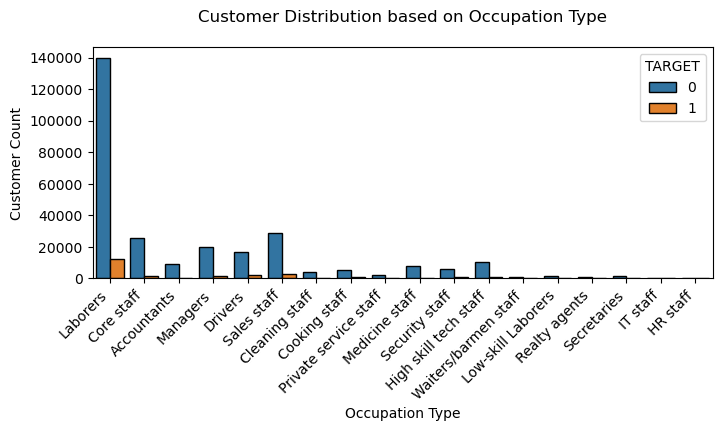

In [100]:
plt.figure(figsize=(8, 3))
sns.countplot(x='OCCUPATION_TYPE', data=dfeda, hue='TARGET', edgecolor='black')
plt.title('Customer Distribution based on Occupation Type\n')
plt.xlabel('Occupation Type')
plt.ylabel('Customer Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Insight:
- Customers who work as laborers tend to have no paying difficulties.

In [77]:
# age
dfeda['AGE'] = dfeda['DAYS_BIRTH'] / -365
dfeda['AGE'] = dfeda['AGE'].astype(int)

# employed duration
dfeda['EMPLOYMENT_DURATION'] = dfeda['DAYS_EMPLOYED'] / -365
dfeda['EMPLOYMENT_DURATION'] = dfeda['EMPLOYMENT_DURATION'].astype(int)

# registration duration
dfeda['REGISTRATION_DURATION'] = dfeda['DAYS_REGISTRATION'] / -365
dfeda['REGISTRATION_DURATION'] = dfeda['REGISTRATION_DURATION'].astype(int)

# last identity change
dfeda['LAST_ID_CHANGE'] = dfeda['DAYS_ID_PUBLISH'] / -365
dfeda['LAST_ID_CHANGE'] = dfeda['LAST_ID_CHANGE'].astype(int)

# last phone change
dfeda['LAST_PHONE_CHANGE'] = dfeda['DAYS_LAST_PHONE_CHANGE'] / -365
dfeda['LAST_PHONE_CHANGE'] = dfeda['LAST_PHONE_CHANGE'].astype(int)

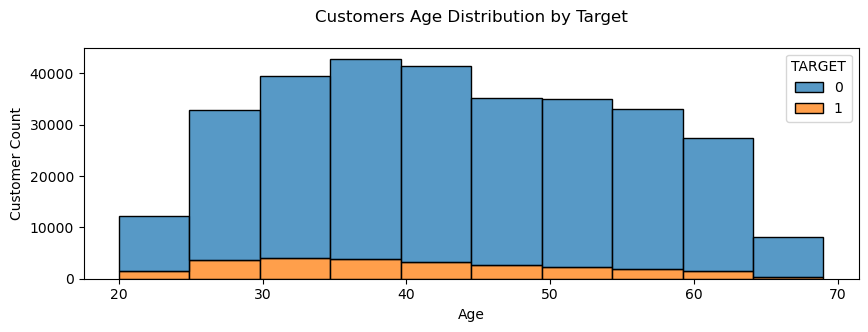

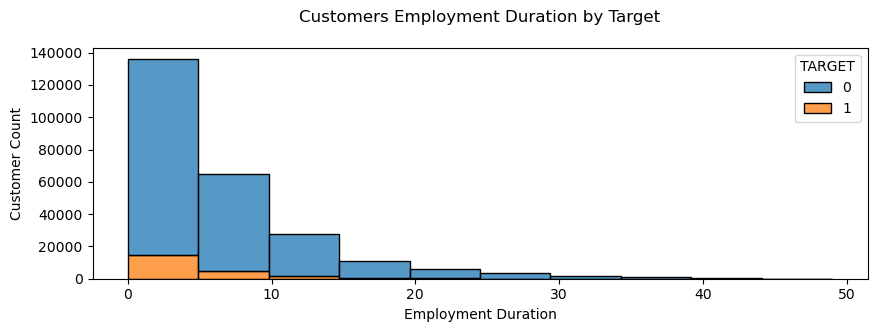

In [105]:
plt.figure(figsize=(10, 3))
sns.histplot(data=dfeda, x='AGE', hue='TARGET', bins=10, edgecolor='black', multiple='stack')
plt.title('Customers Age Distribution by Target\n')
plt.xlabel('Age')
plt.ylabel('Customer Count')
plt.show()

plt.figure(figsize=(10, 3))
valid_data = dfeda[dfeda['EMPLOYMENT_DURATION'] != -1000]
sns.histplot(data=valid_data, x='EMPLOYMENT_DURATION', hue='TARGET', bins=10, edgecolor='black', multiple='stack')
plt.title('Customers Employment Duration by Target\n')
plt.xlabel('Employment Duration')
plt.ylabel('Customer Count')
plt.show()


Insights:
- Customers who are 30-45 years old tend to not have payment difficulties, but customers who are 25-35 years old has a lot more payment difficulties.
- Customers who are employed less than 10 years has a lot more ability to do payment.

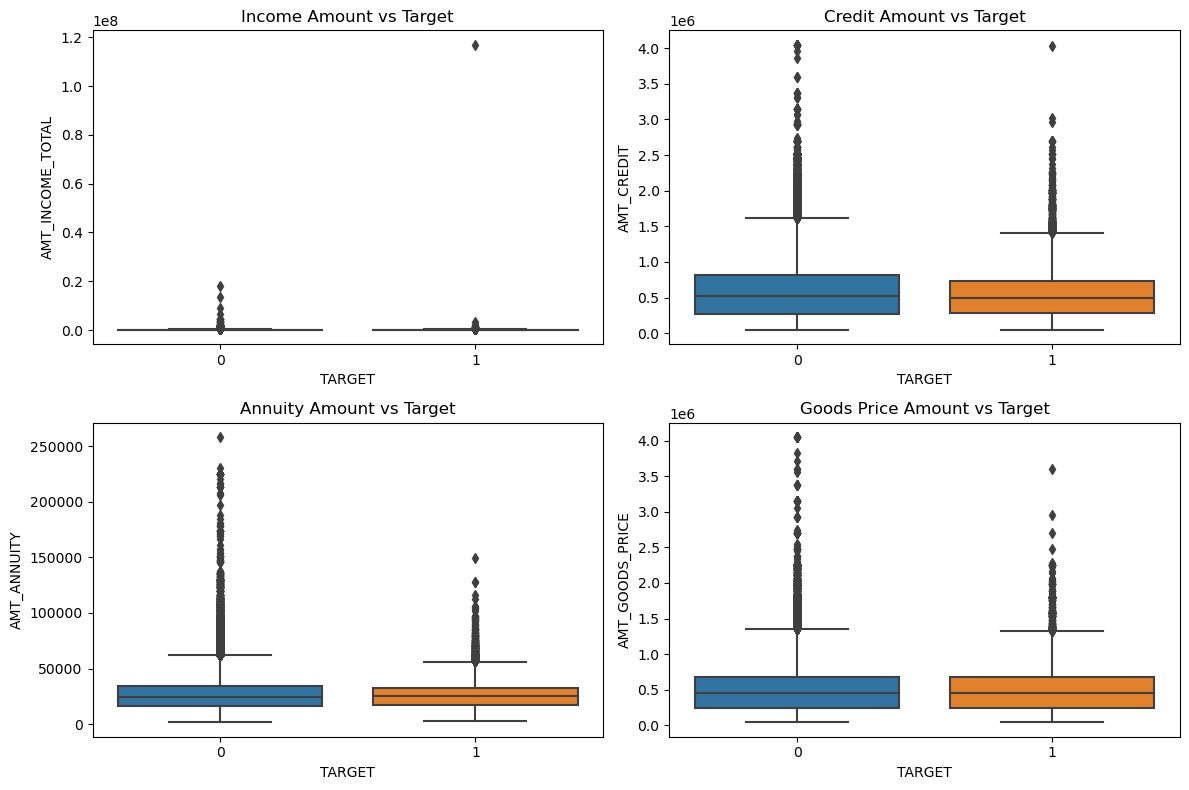

In [94]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=dfeda, ax=axs[0, 0])
axs[0, 0].set_title('Income Amount vs Target')

sns.boxplot(x='TARGET', y='AMT_CREDIT', data=dfeda, ax=axs[0, 1])
axs[0, 1].set_title('Credit Amount vs Target')

sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=dfeda, ax=axs[1, 0])
axs[1, 0].set_title('Annuity Amount vs Target')

sns.boxplot(x='TARGET', y='AMT_GOODS_PRICE', data=dfeda, ax=axs[1, 1])
axs[1, 1].set_title('Goods Price Amount vs Target')

plt.tight_layout()
plt.show()

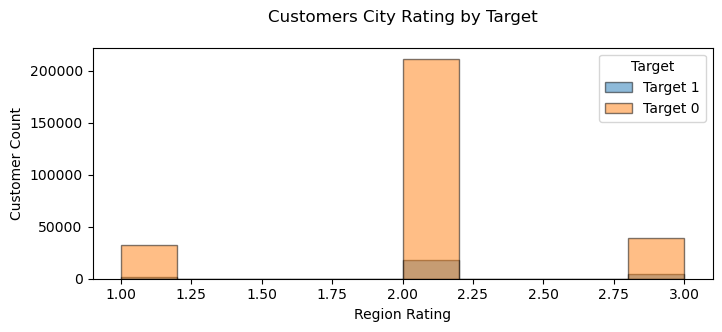

In [97]:
plt.figure(figsize=(8, 3))

for target in dfeda['TARGET'].unique():
    plt.hist(dfeda[dfeda['TARGET'] == target]['REGION_RATING_CLIENT_W_CITY'], 
             bins=10, 
             edgecolor='black', 
             alpha=0.5,
             label=f'Target {target}')

plt.title('Customers City Rating by Target\n')
plt.xlabel('Region Rating')
plt.ylabel('Customer Count')
plt.legend(title='Target')
plt.show()

Insight:
- Customers who are from region that has rating 2.0 tend to not have payment difficulties.

## Machine Learning Model

### Data Preprocessing

In [37]:
df = apptrain2.copy()

In [38]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
nums = df.select_dtypes(include=['int64', 'float64']).columns
cats = df.select_dtypes(include=['object']).columns

In [40]:
df[nums].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.145034e-01,0.515695,1.417523,0.142944,1.400626,0.099717,-962.858119,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908699e-01,0.174736,2.398395,0.446033,2.377224,0.361735,826.807226,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

In [41]:
df[cats].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,151577,53901,67992


**Handling Outliers**

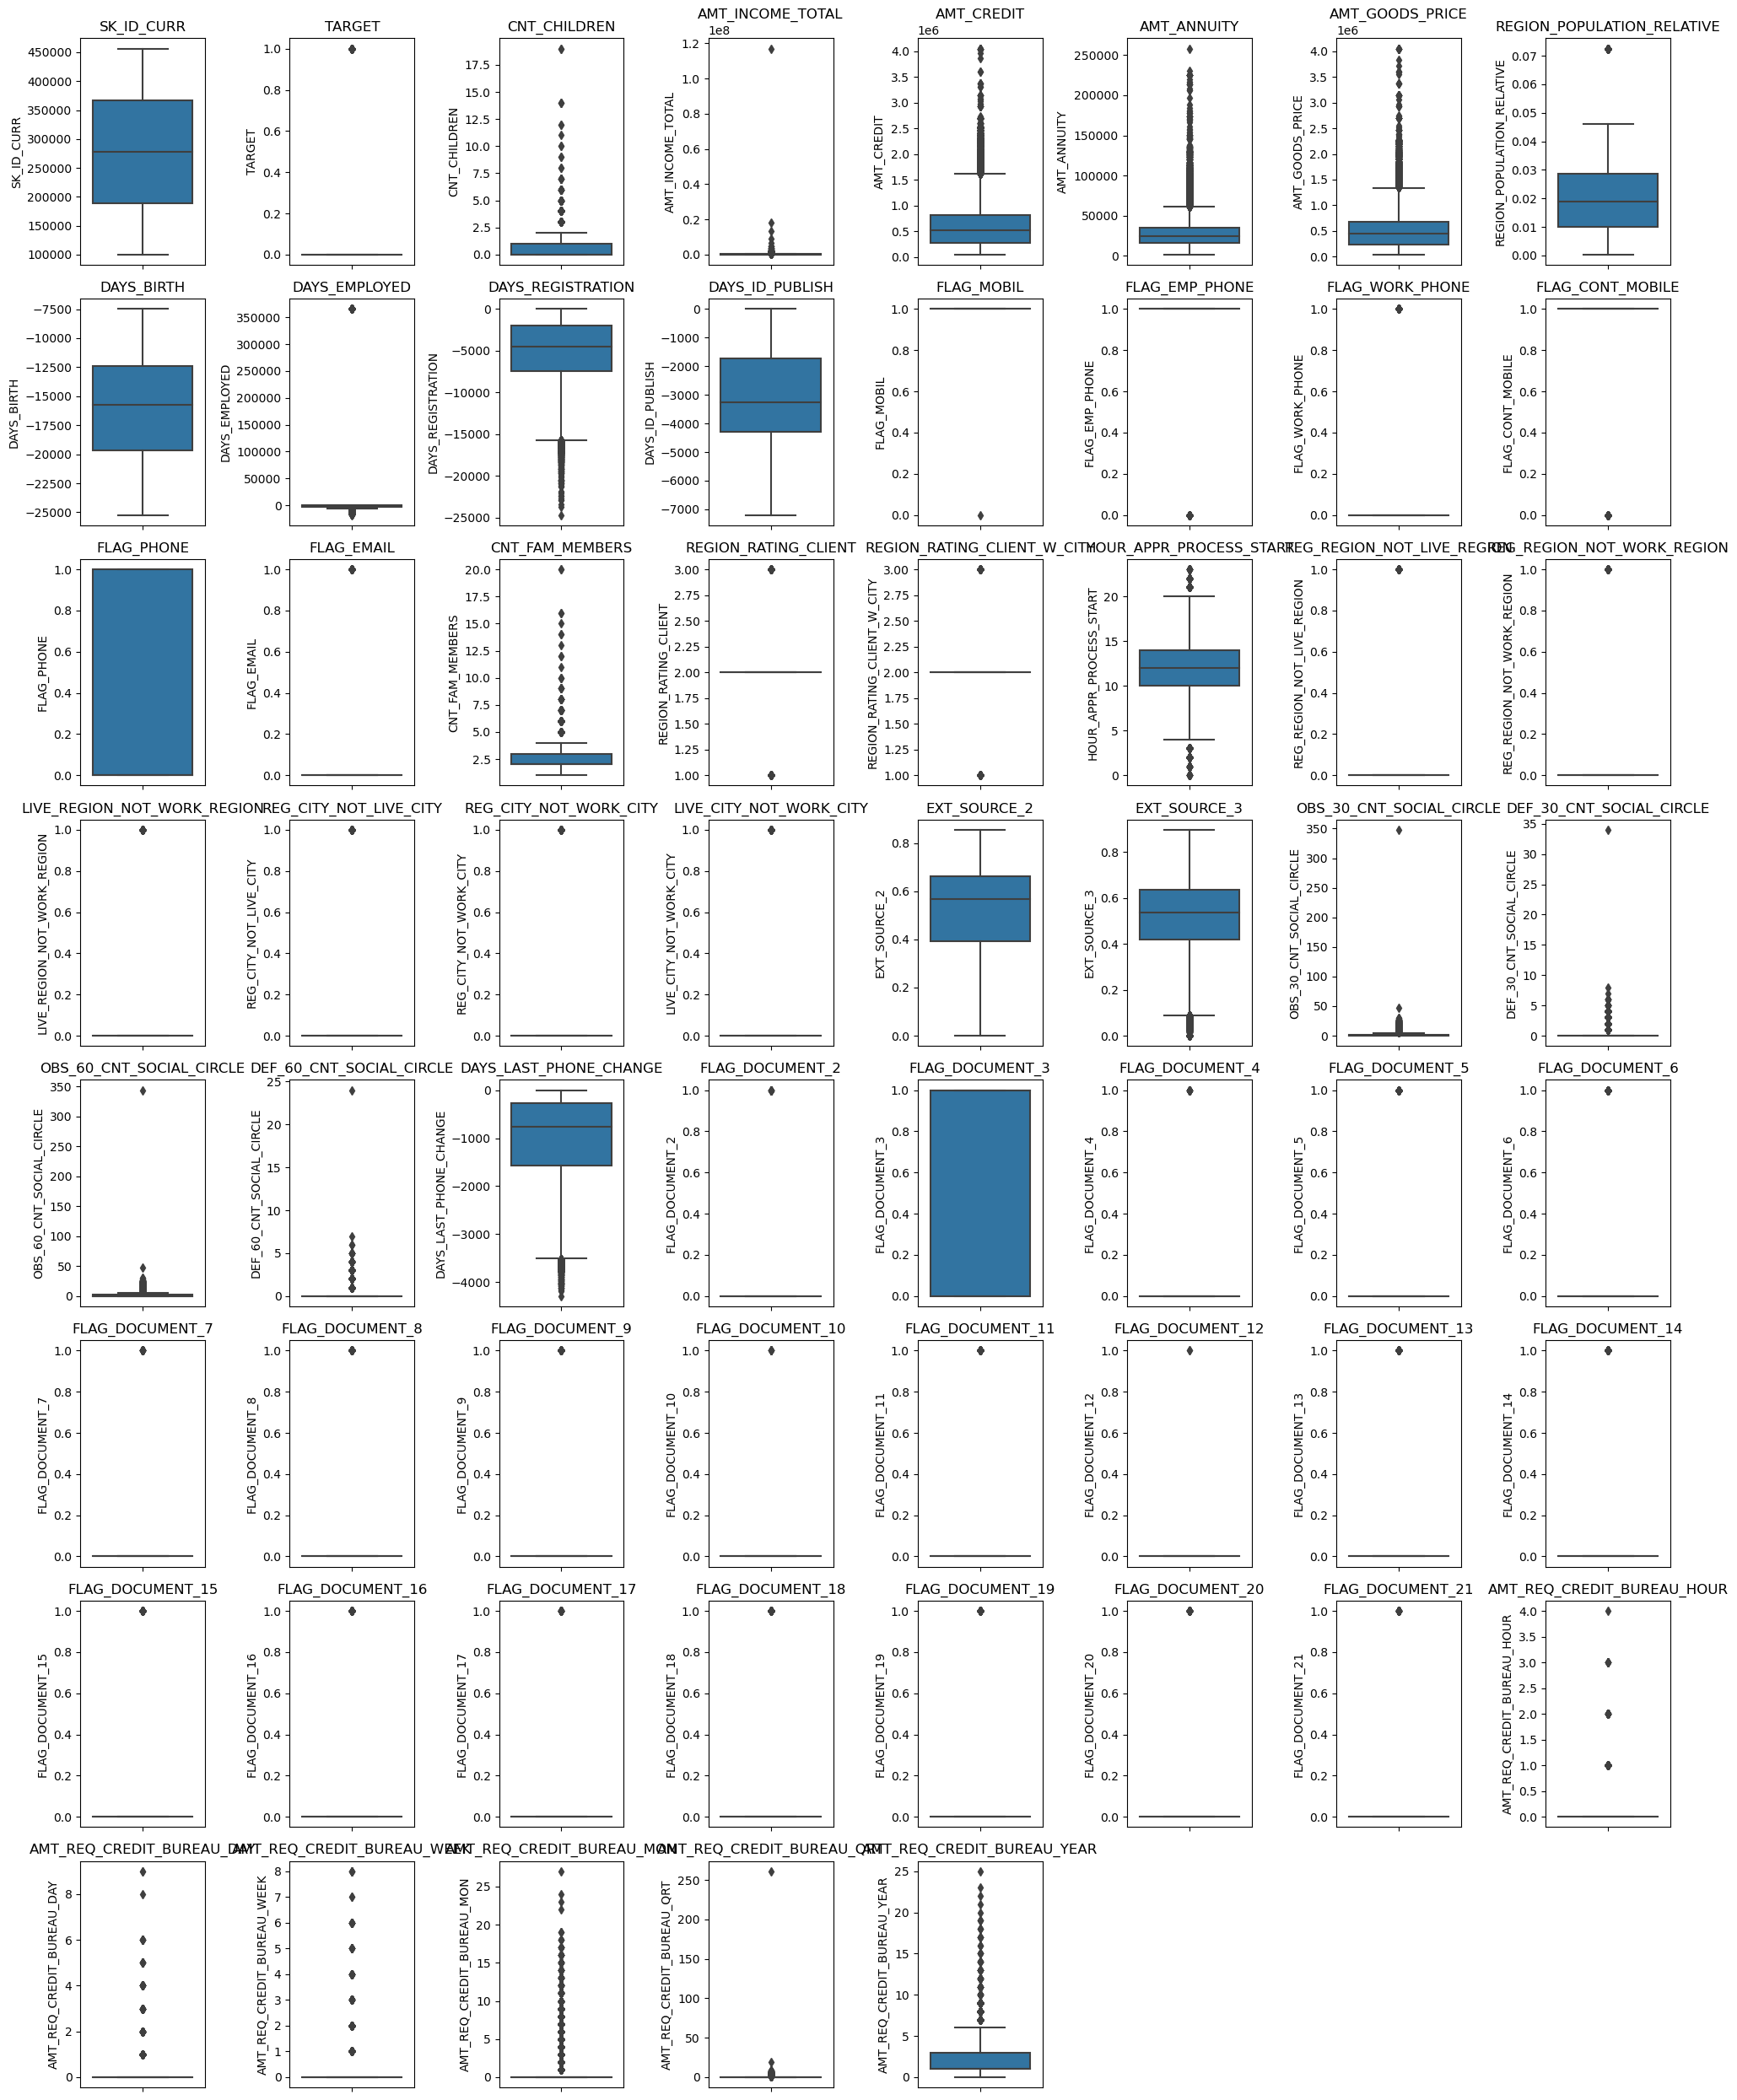

In [42]:
# Boxplots
plt.figure(figsize=(20, 25))
for i, var in enumerate(nums):
    plt.subplot(8, 8, i + 1)
    sns.boxplot(y=df[var])
    plt.title(f'{var}')
plt.tight_layout()
plt.show()

Outliers are not going to be removed since these features contain some unique values that may be useful for machine learning modeling.

**Standardization**

In [43]:
from sklearn.preprocessing import StandardScaler

numerical = df[nums].drop('TARGET', axis=1)
categorical = df.select_dtypes(include=['object', 'category'])
target = df['TARGET']

scaler = StandardScaler()
numerical_scaled = pd.DataFrame(scaler.fit_transform(numerical), columns=numerical.columns)

dfs = pd.concat([numerical_scaled, categorical.reset_index(drop=True), target.reset_index(drop=True)], axis=1)

In [44]:
dfs.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,TARGET
0,-1.733423,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,1.506880,-0.456215,0.379837,0.579154,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-1.265722,-0.103064,-0.062699,-0.631821,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-1.317940,-2.153651,0.242861,4.163504,0.252132,5.253260,-0.206992,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,1
1,-1.733413,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.252750,-0.166821,-0.460115,1.078697,1.790855,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.167638,-2.067573,-2.051813,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,0.564482,0.112063,-0.174085,-0.320480,-0.168527,-0.275663,0.163107,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,0
2,-1.733403,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,-0.689509,-0.453299,0.206116,0.306869,0.001803,0.468697,2.003956,0.043245,1.599337,-0.245215,-1.265722,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,0.216948,1.223975,-0.591031,-0.320480,-0.589187,-0.275663,0.178831,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,0
3,-1.733384,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.167638,-0.103064,-0.062699,1.511587,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,0.712205,0.112063,0.242861,-0.320480,0.252132,-0.275663,0.418306,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332

**Feature Encoding**

In [45]:
dfs[cats].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,151577,53901,67992


1. Label Encoding

In [46]:
# contract type
dfs['NAME_CONTRACT_TYPE'] = dfs['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})

# gender
dfs['CODE_GENDER'] = dfs['CODE_GENDER'].map({'F': 1, 'M': 0, 'XNA': 1})

# own car
dfs['FLAG_OWN_CAR'] = dfs['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})

# own realty
dfs['FLAG_OWN_REALTY'] = dfs['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})

# suite type
dfs['NAME_TYPE_SUITE'] = dfs['NAME_TYPE_SUITE'].map({'Unaccompanied': 0, 'Other_B': 0, 'Other_A': 0, 'Group of people': 0,
                                                     'Family': 1, 'Spouse, partner': 1, 'Children': 1})

# income type
dfs['NAME_INCOME_TYPE'] = dfs['NAME_INCOME_TYPE'].map({'Working': 1, 'Commercial associate': 1, 'State servant': 1, 'Businessman': 1,
                                                      'Unemployed': 0,'Student': 0,
                                                      'Pensioner': 2, 'Maternity leave': 2})

# education level
dfs['NAME_EDUCATION_TYPE'] = dfs['NAME_EDUCATION_TYPE'].map({'Academic degree': 0, 
                                                             'Higher education': 1, 
                                                             'Incomplete higher': 2,
                                                             'Secondary / secondary special': 3, 
                                                             'Lower secondary': 4})

# family status
dfs['NAME_FAMILY_STATUS'] = dfs['NAME_FAMILY_STATUS'].map({'Single / not married': 0, 'Separated': 0, 'Widow': 0, 'Unknown': 0,
                                                     'Married': 1, 'Civil marriage': 1})


# housing type
dfs['NAME_HOUSING_TYPE'] = dfs['NAME_HOUSING_TYPE'].map({'Municipal apartment': 0, 'Rented apartment': 0, 'Office apartment': 0, 'Co-op apartment': 0,
                                                     'House / apartment': 1, 'With parents': 1})

In [47]:
dfe = dfs.drop(columns=['OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'])

In [48]:
dfe.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,TARGET
0,-1.733423,-0.577538,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,1.506880,-0.456215,0.379837,0.579154,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-1.265722,-0.103064,-0.062699,-0.631821,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-1.317940,-2.153651,0.242861,4.163504,0.252132,5.253260,-0.206992,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926,0,0,0,1,0,1,3,0,1,1
1,-1.733413,-0.577538,0.426792,1.725450,0.592683,1.600873,-1.252750,-0.166821,-0.460115,1.078697,1.790855,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.167638,-2.067573,-2.051813,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,0.564482,0.112063,-0.174085,-0.320480,-0.168527,-0.275663,0.163107,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,0,1,0,0,1,1,1,1,1,0
2,-1.733403,-0.577538,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,-0.689509,-0.453299,0.206116,0.306869,0.001803,0.468697,2.003956,0.043245,1.599337,-0.245215,-1.265722,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,0.216948,1.223975,-0.591031,-0.320480,-0.589187,-0.275663,0.178831,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,1,0,1,1,0,1,3,0,1,0
3,-1.733384,-0.577538,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.167638,-0.103064,-0.062699,1.511587,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,0.712205,0.112063,0.242861,-0.320480,0.252132,-0.275663,0.418306,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926,0,1,0,1,0,1,3,1,1,0
4,-1.733374,-0.577538,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892535,-0.473210,0.191639,-0.307263,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-1.265722,-0.103064,-0.062699,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,1.827367,2.137601,-1.004691,0.112063

**Train & Test Split**

In [49]:
from sklearn.model_selection import train_test_split

X = dfe.drop(columns=['TARGET', 'SK_ID_CURR'])
y = dfe['TARGET']

# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
y_train.value_counts()

TARGET
0    197845
1     17412
Name: count, dtype: int64

In [51]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Oversampling the minority class
oversampler = RandomOverSampler(sampling_strategy={1: 84903}, random_state=42)  # You can specify the strategy
X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

# Step 2: Undersampling the majority class
# The goal is to ensure the number of majority instances does not exceed the number of minority instances
undersampler = RandomUnderSampler(sampling_strategy={0: 127354}, random_state=42)  # Can also adjust the strategy
X_balanced, y_balanced = undersampler.fit_resample(X_oversampled, y_oversampled)

In [52]:
y_balanced.value_counts()

TARGET
0    127354
1     84903
Name: count, dtype: int64

**Modeling**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_auc_score
import xgboost as xgb

# Define the models to be evaluated
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Loop through each model, fit, predict, and evaluate
for name, model in models.items():
    model.fit(X_balanced, y_balanced)
    
    y_pred_balanced = model.predict(X_test)
    y_pred_prob_balanced = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred_balanced
    
    # Calculate accuracy and recall
    accuracy = accuracy_score(y_test, y_pred_balanced)
    recall = recall_score(y_test, y_pred_balanced)
    
    print(f"Results for {name}:")
    print("Accuracy Score:", accuracy)
    print("Recall Score:", recall)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_balanced))
    print("="*50)

Results for Logistic Regression:
Accuracy Score: 0.7943612201096971
Recall Score: 0.49844867125320386
Confusion Matrix:
 [[69588 15253]
 [ 3718  3695]]
ROC AUC Score: 0.7395761993002764
Results for Random Forest:
Accuracy Score: 0.9171960023413619
Recall Score: 0.05719681640361527
Confusion Matrix:
 [[84191   650]
 [ 6989   424]]
ROC AUC Score: 0.7304912664548902
Results for XGBoost:
Accuracy Score: 0.8087779391679494
Recall Score: 0.46458923512747874
Confusion Matrix:
 [[71169 13672]
 [ 3969  3444]]
ROC AUC Score: 0.7387485459286691
Results for Decision Tree:
Accuracy Score: 0.8282459297157847
Recall Score: 0.20221232969108324
Confusion Matrix:
 [[74910  9931]
 [ 5914  1499]]
ROC AUC Score: 0.5425790376311052
Results for Gradient Boosting:
Accuracy Score: 0.8017863724066165
Recall Score: 0.49844867125320386
Confusion Matrix:
 [[70273 14568]
 [ 3718  3695]]
ROC AUC Score: 0.7463186360174237


In [55]:
from sklearn.inspection import permutation_importance

gbc = GradientBoostingClassifier()
gbc.fit(X_balanced, y_balanced)

results = permutation_importance(gbc, X_test, y_test, scoring='roc_auc')

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                        Feature    Importance
27                 EXT_SOURCE_3  6.885215e-02
26                 EXT_SOURCE_2  5.488822e-02
4               AMT_GOODS_PRICE  1.460000e-02
60                  CODE_GENDER  9.978350e-03
65          NAME_EDUCATION_TYPE  8.667054e-03
2                    AMT_CREDIT  7.782594e-03
6                    DAYS_BIRTH  5.323908e-03
7                 DAYS_EMPLOYED  4.906306e-03
61                 FLAG_OWN_CAR  3.149379e-03
3                   AMT_ANNUITY  2.857037e-03
59           NAME_CONTRACT_TYPE  1.738128e-03
9               DAYS_ID_PUBLISH  1.710142e-03
18  REGION_RATING_CLIENT_W_CITY  1.201386e-03
34              FLAG_DOCUMENT_3  1.177355e-03
32       DAYS_LAST_PHONE_CHANGE  8.517050e-04
64             NAME_INCOME_TYPE  6.519077e-04
57    AMT_REQ_CREDIT_BUREAU_QRT  5.399688e-04
1              AMT_INCOME_TOTAL  3.788857e-04
29     DEF_30_CNT_SOCIAL_CIRCLE  3.419044e-04
23       REG_CITY_NOT_LIVE_CITY  3.309772e-04
31     DEF_60_CNT_SOCIAL_CIRCLE  3

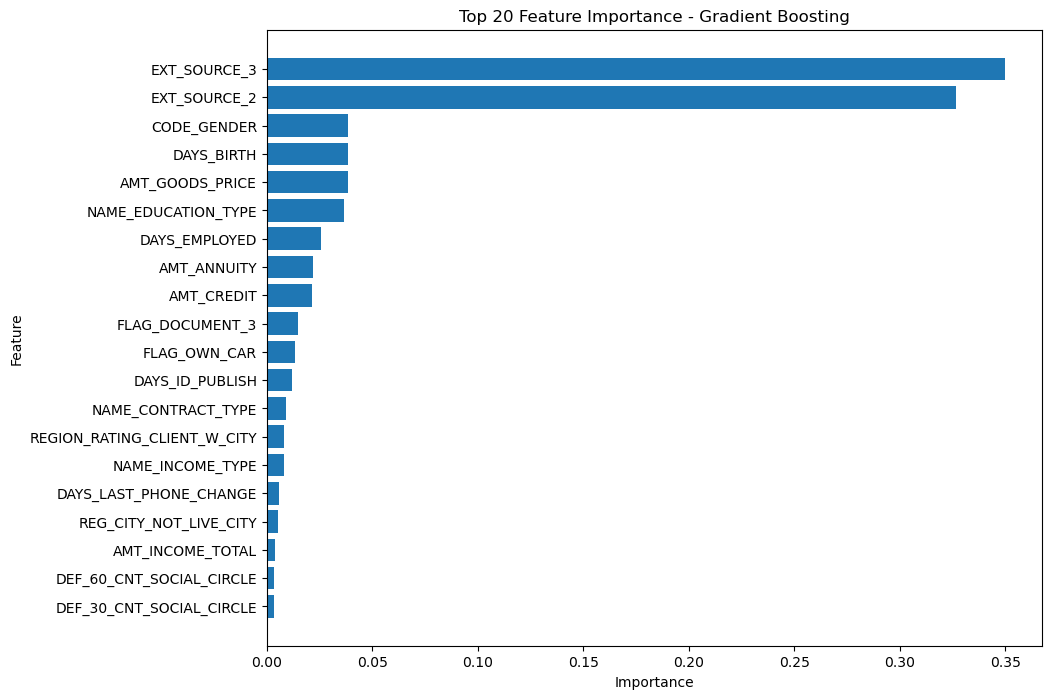

In [57]:
gbc = GradientBoostingClassifier()
gbc.fit(X_balanced, y_balanced)

# Get feature importance for Gradient Boosting model
importance = gbc.feature_importances_

# Create a DataFrame for better visualization
import pandas as pd
feature_names = X_test.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 20 important features
top_20_features = feature_importance_df.head(20)

# Plot top 20 feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_balanced, y_balanced)

# Get feature importance for Gradient Boosting model
importance = gbc.feature_importances_

# Create a DataFrame for better visualization
import pandas as pd
feature_names = X_test.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Filter features with importance greater than 0.0
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.0]

# Plot feature importance for features with importance > 0.0
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(important_features['Feature'], important_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Importance > 0.0) - Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()

**Confusion Matrix**

In [1]:
cm = confusion_matrix(y_test, y_pred_balanced)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'confusion_matrix' is not defined

In [60]:
apptest2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,Laborers,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,Laborers,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.425687,0.519097,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [62]:
dftes = apptest2.copy()

In [63]:
# contract type
dftes['NAME_CONTRACT_TYPE'] = dftes['NAME_CONTRACT_TYPE'].map({'Cash loans': 0, 'Revolving loans': 1})

# gender
dftes['CODE_GENDER'] = dftes['CODE_GENDER'].map({'F': 1, 'M': 0, 'XNA': 1})

# own car
dftes['FLAG_OWN_CAR'] = dftes['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})

# own realty
dftes['FLAG_OWN_REALTY'] = dftes['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})

# suite type
dftes['NAME_TYPE_SUITE'] = dftes['NAME_TYPE_SUITE'].map({'Unaccompanied': 0, 'Other_B': 0, 'Other_A': 0, 'Group of people': 0,
                                                     'Family': 1, 'Spouse, partner': 1, 'Children': 1})

# income type
dftes['NAME_INCOME_TYPE'] = dftes['NAME_INCOME_TYPE'].map({'Working': 1, 'Commercial associate': 1, 'State servant': 1, 'Businessman': 1,
                                                      'Unemployed': 0,'Student': 0,
                                                      'Pensioner': 2, 'Maternity leave': 2})

# education level
dftes['NAME_EDUCATION_TYPE'] = dftes['NAME_EDUCATION_TYPE'].map({'Academic degree': 0, 
                                                             'Higher education': 1, 
                                                             'Incomplete higher': 2,
                                                             'Secondary / secondary special': 3, 
                                                             'Lower secondary': 4})

# family status
dftes['NAME_FAMILY_STATUS'] = dftes['NAME_FAMILY_STATUS'].map({'Single / not married': 0, 'Separated': 0, 'Widow': 0, 'Unknown': 0,
                                                     'Married': 1, 'Civil marriage': 1})


# housing type
dftes['NAME_HOUSING_TYPE'] = dftes['NAME_HOUSING_TYPE'].map({'Municipal apartment': 0, 'Rented apartment': 0, 'Office apartment': 0, 'Co-op apartment': 0,
                                                     'House / apartment': 1, 'With parents': 1})

In [64]:
dftes = dftes.drop(columns=['OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'])

In [65]:
# List of columns to apply abs() on
convert_columns = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

# Convert negative values to positive values in the specified columns
dftes[convert_columns] = dftes[convert_columns].abs()

In [72]:
dftes_features = dftes[X_balanced.columns]

predict = pd.Series(gbc.predict(dftes_features), name='TARGET').astype(int)

results = pd.concat([apptest2['SK_ID_CURR'], predict], axis=1)

results.to_csv('predict_application.csv', index=False)

results.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


## Business Recommendation

1. **Target Female Customers**:
    Since female customers have higher ability to repay loans, it's better to create products that cater more to women and suitable to women's needs.

2. **Leverage External Data Sources**:
   The importance of external sources (ext_source_2 and ext_source_3) in determining repayment ability suggests that the company should utilize these data points in its risk assessment models. This can improve loan approval processes and help in better targeting of loan offers to customers likely to repay.

3. **Promote Loans to Employed Customers with Real Estate**:
   Customers who are employed, have no car, and own real estate have shown low payment difficulties. Company should make products that cater to this demographic, possibly offering incentives for customers who meet these criteria.

4. **Targeting Different Age Groups**:
   It's shown that customers aged 30-45 are more reliable in terms of repayments compared to those aged 25-35. The company should segment its marketing strategies, offering tailored financial education and loan products for younger customers (25-35) to help improve their financial management skills and reduce repayment difficulties.

5. **Target Customers with Shorter Employment Durations**:
   Since customers who are employed for less than 10 years tend to have a higher ability to repay loans, company should actively seek to attract this segment by providing them with favorable loan conditions. Offering fast-track loan approvals or low-interest rates for this group can incentivize them to choose the company for their borrowing needs.

6. **Focus on Regions with Higher Ratings**:
   Since customers from regions with a rating of 2.0 have fewer payment difficulties, the business should consider targeting these regions more. Developing marketing campaigns and loan products specific to these areas can lead to increased customer acquisition and improved loan performance.